# CS3DM - Lab 2

## Objectives
To understand some basic data structures that are useful for data mining, including lists, dictionaries and Numpy arrays.

## Suggested Reading
Jake VandePlas, *Python Data Science Handbook*, Chapters 2 and 3.1: <https://jakevdp.github.io/PythonDataScienceHandbook/>

## Instructions
This is a follow-on tutorial. There are a few _To DO_ blocks, but most of this tutorial is for you to follow through. Please take your time at each block to understand what is being done, and feel free to tinker, explore and modify any block to check your understanding (if you break anything you can always ctrl-Z, or in the worst case download the original Notebook again).
*****

## Python Lists
Python has a built-in list type, aptly named "list", which are written within square brackets. We can also use square brackets to access data. Remember that indexing in Python starts from zero.

In [4]:
colors = ['red', 'blue', 'green']
for i in range(0, 3):    # note: range(0,3) = [0, 1, 2]
  print(colors[i])


red
blue
green


Note that assignments with `=` on a list object do not make copies of the object, but instead generate new variables pointing to the same one list in memory. This is a common source of errors. 

In [5]:
other = colors
other[0] = "yellow"
print(colors) # colors was changed indirectly

['yellow', 'blue', 'green']


In [6]:
# To generate an actual copy we use "slicing" on the list
colors = ['red', 'blue', 'green']
other = colors[:]
other[0] = "yellow"
print(colors)


['red', 'blue', 'green']


In [7]:
print(other)

['yellow', 'blue', 'green']


Defining lists is simple, as seen above. You can put any data types in a list (and even mix a bit!)

In [8]:
bicycles = ['trek', 'cannondale', 'redline', 'specialised']
numbers = [5, 4, 3, 2, 1]
mix_list = [True, "hi", 34, 3.141592]
print(bicycles)
print(numbers)
print(mix_list)

['trek', 'cannondale', 'redline', 'specialised']
[5, 4, 3, 2, 1]
[True, 'hi', 34, 3.141592]


We can access elements in a list by their indices, using square brackets. Negative indices allow us to start from the end of the list (which has index `[-1]`)

In [9]:
print(bicycles[-2])

bicycles[0] = 'marin' # Replace the last element 
message = "My first bicycle was a " + bicycles[0].title() + '.'
print(message)

redline
My first bicycle was a Marin.


We can grow a list using the `append()` method, which allows us to build lists dynamically. The `insert()` method allows us to insert new elements anywhere (not only at the end)

In [10]:
bicycles = [] # This makes an empty list
print(bicycles)
bicycles.append('trek')
bicycles.append('cannondale')
print(bicycles)

[]
['trek', 'cannondale']


In [11]:
bicycles += ['redline', 'specialised'] # Another way to append
print(bicycles)
bicycles.insert(1, 'marin') # Inserts this bike at index 1 (i.e., second position)
print(bicycles)

['trek', 'cannondale', 'redline', 'specialised']
['trek', 'marin', 'cannondale', 'redline', 'specialised']


In [12]:
del bicycles[2] # You can also remove items from a list using the `del` statement
print(bicycles)

['trek', 'marin', 'redline', 'specialised']


Sometimes you'll want to use the value after you've deleted it from the list. Method `pop()` is useful in these cases,

In [13]:
bicycles = ['trek', 'cannondale', 'redline', 'specialised']
popped_bike = bicycles.pop()
print(bicycles)
print(popped_bike)

['trek', 'cannondale', 'redline']
specialised


In [14]:
# You can pop from any index in the list.
popped_bike = bicycles.pop(1)
print(bicycles)
print(popped_bike)

['trek', 'redline']
cannondale


In [15]:
bicycles.remove("redline") # You can also remove an item by value
print(bicycles)

['trek']


We can sort lists with the `sort()` and `reverse()` methods. Note both these methods **permanently** sort the list, and there is no way to go back to the original order.

In [16]:
bicycles = ['trek', 'cannondale', 'redline', 'specialised']
bicycles.sort()
print(bicycles)

['cannondale', 'redline', 'specialised', 'trek']


In [17]:
bicycles.reverse()
print(bicycles)

['trek', 'specialised', 'redline', 'cannondale']


In [18]:
bicycles = ['trek', 'cannondale', 'redline', 'specialised']
print('Sorted List')
print(sorted(bicycles)) # function sorted() generates a sorted copy (and leaves the original one unaltered)

Sorted List
['cannondale', 'redline', 'specialised', 'trek']


In [19]:
print('Unsorted List')
print(bicycles)

Unsorted List
['trek', 'cannondale', 'redline', 'specialised']


*****
## TO DO
(10 minutes)

> Complete the cell below with code that iterates over all the **names** of the bycicles in the list and prints a different statement depending on whether the name has `<= 7` characters or not. Your result should look something like this:

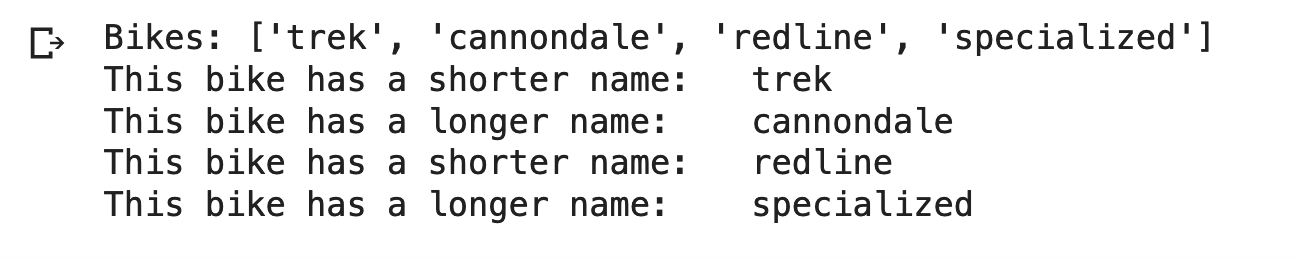

In [20]:
# Please complete this cell with your code
bicycles = ['trek', 'cannondale', 'redline', 'specialised']
print('Bikes: ' + str(bicycles))

# Tip 1: I suggest using a 'for' loop.
# Tip 2: use len() for the number of characters in a name.
for i in bicycles:
    if len(i)<=7:
        print(f"This bike has a shorter name: {i}")
    else:
        print(f"This bike has a longer name: {i}")


Bikes: ['trek', 'cannondale', 'redline', 'specialised']
This bike has a shorter name: trek
This bike has a longer name: cannondale
This bike has a shorter name: redline
This bike has a longer name: specialised


*****

## Dictionaries
Dictionaries are another way in which we can store data. The key difference between dictionaries and lists is that dictionaries are _unordered_ sets of `key:value` pairs. Instead of accessing data by an index, we do it using field names. 

For example, in a dictionary containing people names, `firstName` could be a key and (in my case) `"Felipe"` would be the value.

In Python dictionaries: 
- each key is separated from its value by a `:`, 
- the `key:value` pairs are separated by commas
- the whole thing is enclosed in curly braces. 
- An empty dictionary without any items is written with just two curly braces, `{}`.
- Keys are unique within a dictionary, but the same value can occur multiple times (think: there can me multiple `"Peter"`s in a group)
- The values of a dictionary can be of any type, but the keys must be of an [immutable data type](https://towardsdatascience.com/https-towardsdatascience-com-python-basics-mutable-vs-immutable-objects-829a0cb1530a) such as strings, numbers, or tuples.

A few examples of dictionaries (adapted from [here](https://www.python-course.eu/dictionaries.php)) are:

In [21]:
empty = {} # an empty dictionary
empty

{}

In [22]:
# from Monty Python's famous "Spam" number
food = {"ham" : "yes", "egg" : "yes", "spam" : "no" }
print(food)

{'ham': 'yes', 'egg': 'yes', 'spam': 'no'}


In [23]:
food["spam"] # Use key to access/modify value

'no'

In [24]:
food["spam"] = "yes"
food

{'ham': 'yes', 'egg': 'yes', 'spam': 'yes'}

In [25]:
alien_0 = {'color': 'green', 'points': 5}
alien_0

# Add new key-value pairs to an existing dictionary like this:
alien_0['x_position'] = 0   # add a new key:value pair
alien_0['y_position'] = 25  # add a new key:value pair
alien_0

{'color': 'green', 'points': 5, 'x_position': 0, 'y_position': 25}

`key:value` pairs can be deleted in the same way we delete list entries.

In [26]:
alien_0 = {'color': 'green', 'points': 5}
print(alien_0)

del alien_0['points']
print(alien_0)

{'color': 'green', 'points': 5}
{'color': 'green'}


In [27]:
# We can loop over a dictionary using the `items()` method.

user_0 = {
'login': 'fcampelo',
'first': 'Felipe',
'last': 'Campelo'
}

# notice that we can have multiple iterating variables, and that dictionaries are *unordered*
for key, value in user_0.items(): 
    print("\nKey: " + key + "\tValue: " + value)


Key: login	Value: fcampelo

Key: first	Value: Felipe

Key: last	Value: Campelo


In [28]:
# Sometimes we only need to loop through keys and not values (or vice versa)

for key in user_0.keys():
    print(key.title()) # Printing key names in in Title Case (just because we can ;-) )

print("-------------")

for value in user_0.values():
    print(value.upper()) # Printing values in UPPER CASE


Login
First
Last
-------------
FCAMPELO
FELIPE
CAMPELO


In [29]:
# Dictionaries can be updated using the `.update()` method:
w  = {"house":"Haus", "cat":"Katze", "red":"rot"}
w1 = {"red":"rouge","blau":"bleu"}

w.update(w1) # update one dictionary with another
print(w)

{'house': 'Haus', 'cat': 'Katze', 'red': 'rouge', 'blau': 'bleu'}


Dictionaries can be combined in lists, or even nested (useful in certain types of data representation, such as hierarchical data)

In [30]:
alien_0 = {'color': 'green', 'points': 5}
alien_1 = {'color': 'yellow', 'points': 10}
alien_2 = {'color': 'red', 'points': 15}

# Make a dictionary list
aliens = [alien_0, alien_1, alien_2]

for alien in aliens:
    print(alien)

{'color': 'green', 'points': 5}
{'color': 'yellow', 'points': 10}
{'color': 'red', 'points': 15}


*****
## TO DO
(5 minutes)

Try building a multi-level dictionary called _users_, with the following structure: each **key** should be a username; the **value** associate with key should itself be a dictionary containing the following keys (and examples of associated values):
  - `first`: user's first name
  - `last`: user's last name
  - `Location`: user's current location (city)

Complete it in the following block. Please add at least 2 'users' in your dictionary.

In [31]:
users = {"aeinstein":{
                     "first": "Albert",
                     "last": "Einstein",
                     "location": "Princeton"
                    },
         "mcurie":{
                     "first": "Marie",
                     "last": "Curie",
                     "location": "Paris"
                    }
        } # <----- Replace your solution here

Run the cell below to test if you'r solution is right. The result should look something like this:

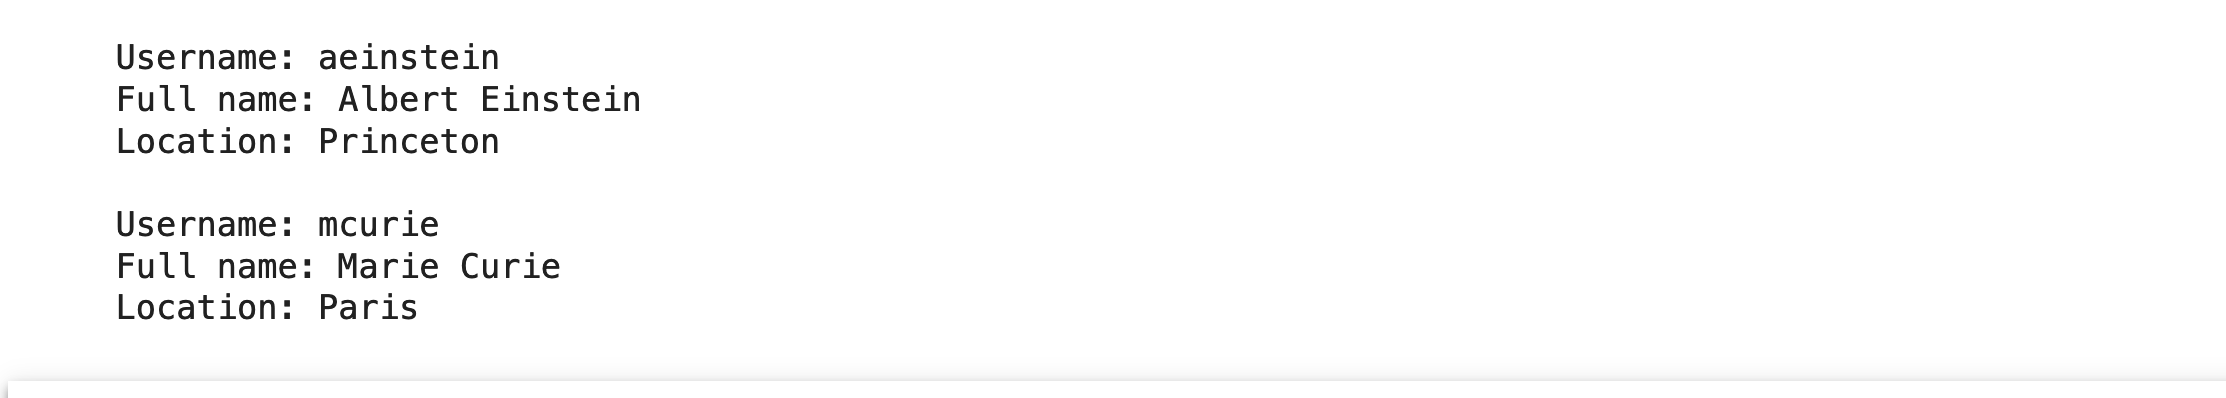

In [32]:
# Use this to check your results
for username, user_info in users.items():
    print("\nUsername: " + username)
    full_name = user_info['first'] + " " + user_info['last']
    location = user_info['location']
    print("Full name: " + full_name.title())
    print("Location: " + location.title())


Username: aeinstein
Full name: Albert Einstein
Location: Princeton

Username: mcurie
Full name: Marie Curie
Location: Paris


*****
## Numpy arrays

**NumPy** is the fundamental package for scientific computing in Python. It provides a particularly versatile data type called a _multidimensional array_ (also called an N-dimensional array, `ndarray`), as well as various derived objects (such as masked arrays and matrices). Numpy also provides an assortment of routines for fast operations on arrays, including mathematical and logical operations, shape manipulation, sorting, selecting, I/O, mathematical transforms (such as, e.g., Fourier transforms), basic linear algebra, basic statistical operations, random simulation, and much more.

At the core of the NumPy package is the `ndarray` object, which encapsulates n-dimensional arrays of homogeneous data types. Many operations on `ndarray` objects are performed in compiled code, which usually gives them very good computational performance. `ndarray` obsjects facilitate advanced mathematical and other types of operations on large numbers of data, typically more efficiently and with less code than is possible using Python's built-in sequences.

NumPy arrays have a fixed size at creation, unlike Python lists (which can grow dynamically). Changing the size of an `ndarray` creates a new array and deletes the original. **Keep this in mind**: it means it can be very innefective to try and grow arrays dynamically (for instance, in a `for` loop - much better to pre-allocate and populate. Also, elements in a NumPy can only be of a single, homogeneous data type.

Finally, NumPy fully supports (although it does not require) an object-oriented approach. `ndarray` is itself a class, possessing numerous methods and attributes, many of which mirror functions in the outermost NumPy namespace.

### Vectorisation and Broadcasting
Two of NumPy's features which are the basis of much of its power are vectorization and broadcasting. 

**Vectorization** describes the absence of any explicit looping, indexing, etc., in the code - these things are still taking place, of course, just "behind the scenes" in optimised, pre-compiled C code. Vectorised code has many advantages, including:
- vectorised code is more concise and easier to read.
- fewer lines of code generally means fewer bugs.
- the code becomes more similar to standard mathematical notation, making it usually easier to correctly code mathematical constructs.

**Broadcasting** is the term used to describe the implicit element-by-element behavior of operations. Generally speaking, all operations in NumPy arrays - not just arithmetic, but also logical, bit-wise, functional, etc. - behave in an element-by-element fashion. Detailed rules of broadcasting can be checked [here](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

*****

### Using Numpy

Numpy is a Python library, and needs to be imported before it is used:


In [33]:
import numpy as np # np is a standard alias for numpy. It makes the code cleaner.

In [34]:
# We can create a NumPy object from a list
some_numbers = [1, 2, 2, 3, 3, 3] # a list
my_array = np.array(some_numbers) # note that, to invoke a function from a package you need to preface it. 'np.array' means 'function array() from package numpy'
my_array

array([1, 2, 2, 3, 3, 3])

To explore the useful array attributes provided by the `ndarray` class, let's start by defining three random arrays with one, two, and three dimensions.  We'll also use NumPy's random number generator.

Each array has attributes `ndim` (number of dimensions), `shape` (size of each dimension), and `size` (the total number of elements in the array, i.e., the product of all elements in `shape`). Another useful attribute is the `dtype`, which informs the data type of the elements in the array

In [35]:
np.random.seed(42)  # set seed of the PRNG

x1 = np.random.randint(10, size=6)         # 1D array
x2 = np.random.randint(10, size=(3, 4))    # 2D array - 3 rows x 4 cols
x3 = np.random.randint(10, size=(3, 4, 5)) # 3D array - 3 rows x 4 cols x 5 layers

x2 # print x2

array([[2, 6, 7, 4],
       [3, 7, 7, 2],
       [5, 4, 1, 7]])

In [36]:
print(x3.ndim)
print(x3.shape)
print(x3.size)
print(x3.dtype)

3
(3, 4, 5)
60
int32


In [37]:
# Indexing is very similar to that of Python lists.
print(x1[-2]) # second-to-last item
print("-----")

# In multidimensional arrays, items can be accessed using comma-separated indices
print(x2[2, 0]) # third row, first column
print("-----")

x2[1, 1] = 9    # modify a single element: second row, second column
print(x2)

6
-----
5
-----
[[2 6 7 4]
 [3 9 7 2]
 [5 4 1 7]]


### Array slicing

Square brackets can also be used to access sub-arrays with the _slice_ notation, marked by the colon (:) character. The NumPy slicing syntax follows that of the standard Python list.

In [38]:
# 1D array with integers from 0 to 11
x = np.arange(12)

print(x[:5])    # first five elements
print(x[10:])   # all elements after index 10
print(x[4:7])   # a range of values
print(x[::3])   # every third element
print(x[1::2])  # every other element, starting at index 1
print("-----")

# If the step value is negative, the defaults for start and stop are swapped. This is a convenient way to reverse an array.
print(x[::-1])  # all elements, reversed
print(x[5::-2]) # reversed every other from index 5

[0 1 2 3 4]
[10 11]
[4 5 6]
[0 3 6 9]
[ 1  3  5  7  9 11]
-----
[11 10  9  8  7  6  5  4  3  2  1  0]
[5 3 1]


In [39]:
# Multi-dimensional slices work in the same way, and we can have multiple slices.
print(x2)
print("-----")
print(x2[:2, :3]) # first 2 rows of the first 3 columns

[[2 6 7 4]
 [3 9 7 2]
 [5 4 1 7]]
-----
[[2 6 7]
 [3 9 7]]


In [40]:
print(x2)
print("-----")
print(x2[1, ::2]) # second row, every other column
print(x2[:, 1])   # all rows, second column
print(x2[0, :])   # first row, all columns

[[2 6 7 4]
 [3 9 7 2]
 [5 4 1 7]]
-----
[3 7]
[6 9 4]
[2 6 7 4]


A very important thing about `ndarray` slices is that they return views rather than copies of the array data. This can be useful when working with large datasets - we can access and process pieces of these datasets without the need to copy the underlying data buffer (which is time-consuming).

In [41]:
print(x2)
print("-----")
x2_sub = x2[:, 2] # third column
x2_sub[0] = -1    # modifying x2_sub changes x2 (first element of third column)
print(x2)         

[[2 6 7 4]
 [3 9 7 2]
 [5 4 1 7]]
-----
[[ 2  6 -1  4]
 [ 3  9  7  2]
 [ 5  4  1  7]]


### Reshaping arrays
Reshaping an array is essentialy reformatting it with a different dimension sizes. This can be most easily performed using the `reshape` method. Note that the `size` of the initial array must match that of the reshaped array.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row (or column) matrix. In addition to the `reshape` method, this can also be easily done using the `newaxis` keyword within a slice operation.

In [42]:
x = np.arange(1, 10) # 1D array, integers from 1 to 9, inclusive
x.reshape((3, 3))    # make it 2D. Notice the double brackets - the argument is a 'tuple'

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [43]:
x = np.array([1, 2, 3])
print(x[np.newaxis, :])
print("-----")
print(x[:, np.newaxis])

[[1 2 3]]
-----
[[1]
 [2]
 [3]]


### Concatenation and splitting

Concatenation of two arrays in NumPy can be done using `np.concatenate`, `np.vstack`, and `np.hstack`. Particularly for arrays of mixed dimensions, it can be (much) clearer to use `np.vstack` (vertical stacking), `np.hstack` (horizontal stacking). `np.dstack` (depth stacking, for 3D arrays) is also available.

In [44]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = np.array([2, 1, 3])
np.concatenate([x, y, z]) # takes a list or a tuple of arrays as argument

array([1, 2, 3, 3, 2, 1, 2, 1, 3])

In [45]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
print( np.concatenate([grid, grid]) )
print("-----")

print( np.concatenate([grid, grid], axis = 1) ) # Do it along the second axis


[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
-----
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]


In [46]:
# Using vstack for arrays of different dimensions: 
x = np.array([1, 2, 3])

np.vstack([grid, x]) # append 1D array 'x' as a row at the bottom of 2D array 'grid'


array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3]])

In [47]:
y = np.array([[99], [98]])
print(y)
print("-----")
np.hstack([grid, y]) # append y to grid, as a column 

[[99]
 [98]]
-----


array([[ 1,  2,  3, 99],
       [ 4,  5,  6, 98]])

The opposite of concatenation is splitting, which can be done using `np.split`, `np.hsplit`, and `np.vsplit`. For each of these, we can pass a list of indices giving the split points.


In [48]:
x = np.arange(10)
print(x)
print("-----")
x1, x2, x3, x4, x5 = np.split(x, [2, 4, 6, 8])
print(x1, x2, x3)
print(x4, x5)


[0 1 2 3 4 5 6 7 8 9]
-----
[0 1] [2 3] [4 5]
[6 7] [8 9]


In [49]:
grid = np.arange(24).reshape((6, 4))
grid


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [50]:
g1, g2 = np.vsplit(grid, [3])
g3, g4 = np.hsplit(grid, [2])
print(g1)
print("-----")
print(g3)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
-----
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]
 [16 17]
 [20 21]]


### Computation with Numpy arrays
One of the most interesting features of NumPy is the availability of vectorised operations, which replace slow loops by what is called _universal functions_, or **ufuncs**. To summarise, loops tend to be relatively slow in Python, mainly because Python needs to do type-checking and other tasks every time the function is called. In contrast, when working with compiled code (such as in C or Java) the type is always known beforehand, making the computations more efficient.

For many types of operations, NumPy provides a convenient interface to _vectorise_ operations so that they can be performed behind-the-scenes using compiled code methods. This vectorised approach is designed to push loops into the compiled layer that underlies NumPy, leading to much faster execution. For instance, suppose you wish to compute the square value of all elements a long numeric array. You can either do an elementwise `for`-loop, or simply:

In [51]:
long_array = np.random.randint(1, 32, size = 100000) # 100,000 random integers between 1 and 32
squared_vals = long_array ** 2
print(long_array[0:5])
print(squared_vals[0:5])

[29 15 13  1 25]
[841 225 169   1 625]


All common arithmetic operations (`+`, `-`, `*`, `/`, `**`, `//`, `%`) are implemented as _ufuncs_ for NumPy. When combined, they (of course) maintain the standard order of operations. Other functions available as _ufuncs_ include trigonometric function (`np.sin`/`arcsin`, `np.cos`/`arccos`, `np.tan`/`arctan`), exponentials (`np.exp`, `np.exp2`, , `np.power`), logarithms (`np.ln`, `np.log2`, `np.log10`) etc. NumPy has many more _ufuncs_ available, including hyperbolic trigonometrics, bitwise arithmetic, comparison operators, angle conversion, rounding, etc. Submodule, `scipy.special` features a number of these more specialised functions.

For binary _ufuncs_, some interesting aggregates can be computed directly from the object. For instance, if we want to _reduce_ (that is, summarise) an array with a particular operation, it is possible to use the `reduce` method of **any** _ufunc_. A _reduce_ repeatedly applies a given operation to the elements of an array until only a single result remains. For example, calling `reduce` on the add _ufunc_ returns the sum of all elements in the array:

In [52]:
x = np.arange(1, 11)         # [1, 2, ..., 10]
print(np.add.reduce(x))      # 1 + 2 + 3 + ... + 10
print(np.multiply.reduce(x)) # 10! = 1 x 2 x 3 x ... x 10

55
3628800


In [53]:
print(np.add.accumulate(x)) # If the intermediate results are of interest, we can use `accumulate`

[ 1  3  6 10 15 21 28 36 45 55]


Finally, any _ufunc_ can also compute the output of all pairs of two different inputs using the `outer` method. For instance, to create a multiplication table you only need:

In [54]:
x = np.arange(1, 11)
np.multiply.outer(x, x)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

*****
## TO DO
(10 minutes)

Let's verify the claim that if we check enough random vectors we will inevitably find high correlations by chance alone. A simple test can be done as follows:

- Create a 1,000x10 (1,000 rows, 10 columns) `ndarray` object populated with random numbers following a standard Normal (Gaussian) distribution (check `np.random.normal()`). This will simulate the case where we had 1000 unrelated variables observed on 10 occasions (for instance, year totals for 10 years). Store this in variable `X`.

- Calculate the correlation matrix for the variables above (check `np.corrcoef()`). This matrix will be a 1,000x1,000 matrix containing the [correlation](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/#definition) between all pairs of variables. Store this in variable `M`.

Correlation matrices have two characteristics that are not very useful for our purpose here: The main diagonal elements are always 1 (a variable always agrees perfectly with itself) and the matrix is symmatric - if you switch the row and column indices, the value is the same. 

- Change your variable `M` so that all values in the main diagonal AND below it are replaced by zero. Functions `np.tril()` and `np.fill_diagonal()` can help here.

- Get the indices of any correlations that have a magnitude greater than 0.95 (that is, lower than `-0.95` or higher than `0.95`. This indicates an immensely high agreement!). Check the documentation of function `np.where()`. Store these indices in two variables, `pos` (for highly positive correlations) and `neg` (for highly negative correlations). Check the values of the correlations themselves using `M[pos]` and `M[neg]`.

- Run the code at the end of this Notebook to visualise the (completely spurious) high positive correlations that you found (change it to see your negative ones too). We'll talk more about data visualisation later in these labs.


How many high-correlation variables did random chance generate for you? Notice how impressive they would look if you didn't know how many pairs were looked at before these emerged - and think about this next time you see seemingly miraculous findings reported. It's always important (but sometimes difficult) to know how many things were tested, not only the most impressive results. ;-)

In [57]:
# import numpy as np # np is a standard alias for numpy. It makes the code cleaner.

# X =    # Create your X
X = np.random.normal(size=(1000,10))
# M =    # Calculate your M
M = np.corrcoef(X)
# M =    # Modify your M so that all values in the main diagonal and above it are replaced by 0
np.fill_diagonal(M, 0)
# Return a copy of an array with elements above the k-th diagonal zeroed, (k=0 the default is the main diagonal). 
M = np.tril(M)

# Get the indices of high positive/negative correlations
pos = np.where(M > 0.95)  # pos = np.asarray(M > 0.95).nonzero()
neg = np.where(M < -0.95)  # neg = np.asarray(M < -0.95).nonzero()

print(M[pos]) # Check the correlation values
M[neg]


[0.95079178 0.96586224 0.9535564  0.97399366 0.95015397 0.96992605
 0.95004347]


array([-0.95374102, -0.95846607])

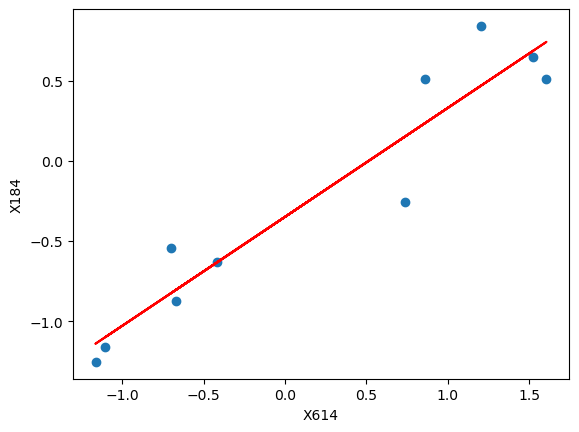

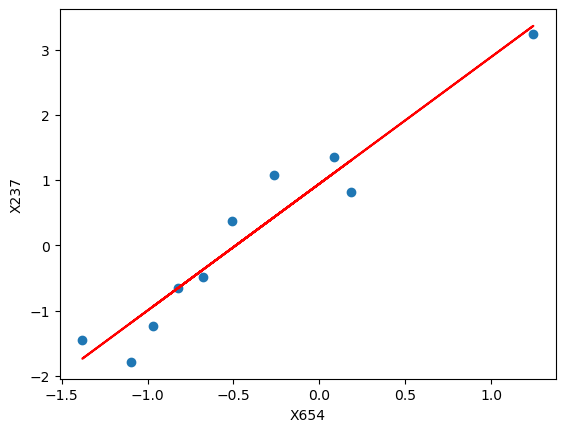

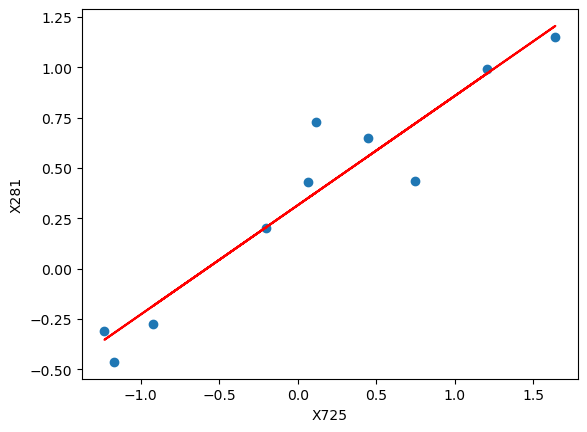

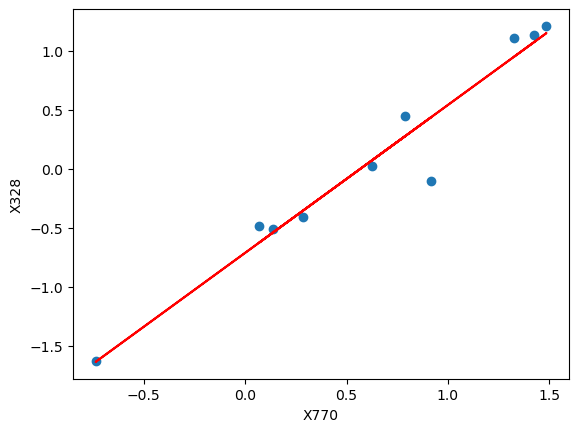

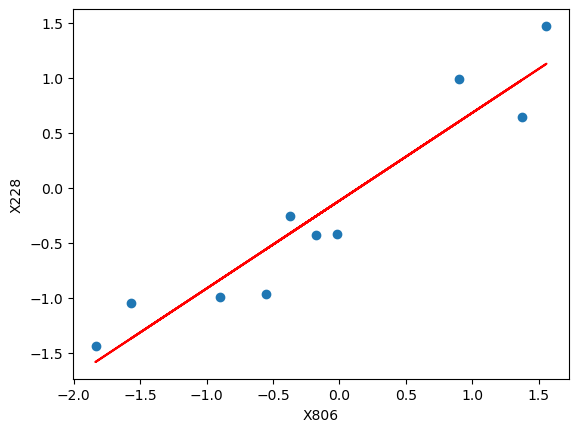

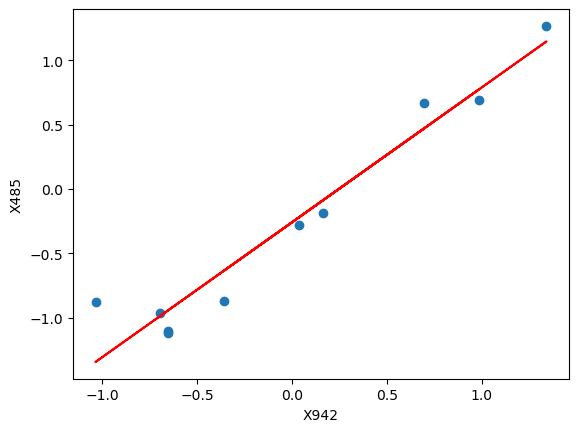

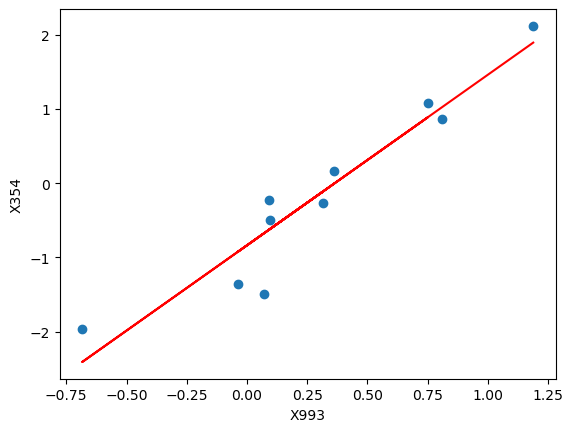

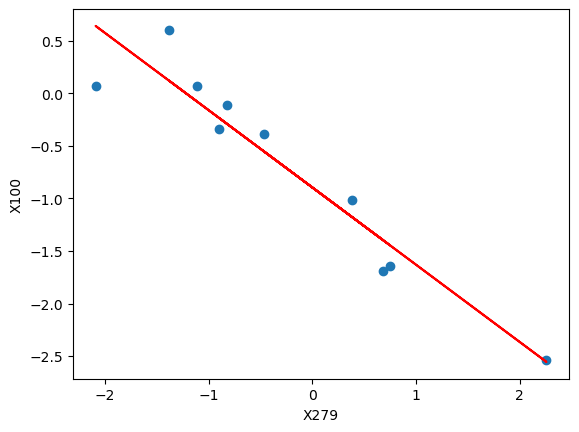

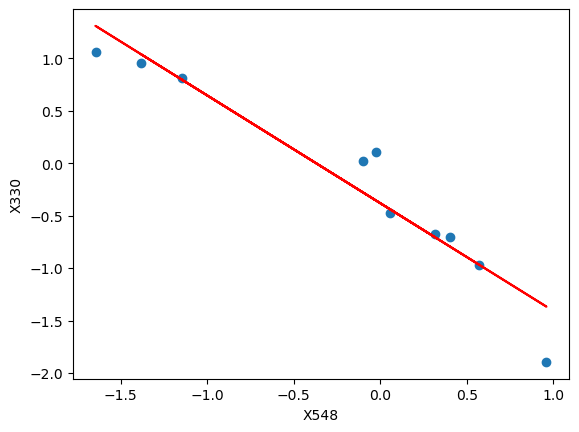

In [58]:
# Use this block to generate plots

import matplotlib.pyplot as plt

for i in np.arange(pos[0].size):
  z = np.polyfit(X[pos[0][i],:], X[pos[1][i],:], 1)
  p = np.poly1d(z)

  plt.figure()
  plt.plot(X[pos[0][i],:], X[pos[1][i],:], 'o')
  plt.plot(X[pos[0][i],:], p(X[pos[0][i],:]), "r-")
  plt.xlabel("X" + str(pos[0][i]))
  plt.ylabel("X" + str(pos[1][i]))
  plt.show()

for i in np.arange(neg[0].size):
  z = np.polyfit(X[neg[0][i],:], X[neg[1][i],:], 1)
  p = np.poly1d(z)

  plt.figure()
  plt.plot(X[neg[0][i],:], X[neg[1][i],:], 'o')
  plt.plot(X[neg[0][i],:], p(X[neg[0][i],:]), "r-")
  plt.xlabel("X" + str(neg[0][i]))
  plt.ylabel("X" + str(neg[1][i]))
  plt.show()